In [1]:
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [39]:
VIDEOS_PATH_NIR = "NIR/NIR/Videos"
OBJECT_ANNOTATIONS_NIR_PATH = "NIR/NIR/ObjectGT"
VIDEO_FRAMES_PATH_NIR = '/home/fyp3/Desktop/Batch18/Obj_Track/SMD_NIR/train/'


In [7]:
video_files_nir = [join(VIDEOS_PATH_NIR, f) for f in listdir(VIDEOS_PATH_NIR) 
                       if isfile(join(VIDEOS_PATH_NIR, f))]

In [8]:
video_files_nir_dict = {}
for f in listdir(VIDEOS_PATH_NIR):
    if isfile(join(VIDEOS_PATH_NIR, f)):
        video_files_nir_dict[f.split('.')[0]] = join(VIDEOS_PATH_NIR, f)

In [9]:
object_gt_files_nir_dict = {}
for f in listdir(OBJECT_ANNOTATIONS_NIR_PATH):
    if isfile(join(OBJECT_ANNOTATIONS_NIR_PATH, f)):
        object_gt_files_nir_dict[f.split('.')[0].replace('_ObjectGT','')] = join(OBJECT_ANNOTATIONS_NIR_PATH, f)

In [10]:
print('Number of near infra-red videos: ', len(video_files_nir_dict))
print('Number of near infra-red ground truth files: ', len(object_gt_files_nir_dict))

Number of near infra-red videos:  31
Number of near infra-red ground truth files:  23


In [12]:
missing_files_nir = []
for key in video_files_nir_dict.keys():
    if key not in object_gt_files_nir_dict:
        missing_files_nir.append(key)
        
print("Unlabelled nir videos: ", missing_files_nir)


# set whether to remove or not the missing videos from the frames generation later
remove_missing_files = True
if remove_missing_files:
    for key in missing_files_nir:
        del video_files_nir_dict[key]
        
    print()
    print('Size of video dictionaries after removing the videos without ground truth:')

    print('Number of near infra-red videos: ', len(video_files_nir_dict))
    print('Number of near infra-red ground truth files: ', len(object_gt_files_nir_dict))

Unlabelled nir videos:  ['MVI_1475_NIR', 'MVI_1474_NIR', 'MVI_1478_NIR', 'MVI_1480_NIR', 'generate_frames', 'MVI_1481_NIR', 'MVI_1483_NIR', 'MVI_1484_NIR']

Size of video dictionaries after removing the videos without ground truth:
Number of near infra-red videos:  23
Number of near infra-red ground truth files:  23


In [13]:
for video_key in video_files_nir_dict:
    #video_name = 'MVI_1478_VIS'
    vidcap = cv2.VideoCapture(video_files_nir_dict.get(video_key))
    success,image = vidcap.read()
    count = 0
    success = True
    while success:
      cv2.imwrite(VIDEO_FRAMES_PATH_NIR + video_key + "_frame%d.jpg" % count, image)     # save frame as JPEG file
      success,image = vidcap.read()
      #print('Read a new frame: ', success)
      count += 1
    print("Derived %d frames" % count)

Derived 600 frames
Derived 274 frames
Derived 600 frames
Derived 317 frames
Derived 799 frames
Derived 534 frames
Derived 601 frames
Derived 600 frames
Derived 541 frames
Derived 262 frames
Derived 440 frames
Derived 349 frames
Derived 295 frames
Derived 600 frames
Derived 520 frames
Derived 497 frames
Derived 579 frames
Derived 508 frames
Derived 417 frames
Derived 566 frames
Derived 478 frames
Derived 602 frames
Derived 307 frames


In [14]:
SEPARATE_FOLDERS = False

In [15]:
TRAIN_PATH = './train'
TEST_PATH = './test'
VIDEO_FRAMES_FOLDER_NAME_NIR = 'VIS_NIR'


folder_names = [TRAIN_PATH, TEST_PATH]

# first create the folders if they don't exist
for folder_name in folder_names:
    if not (os.path.isdir(folder_name)):
        os.mkdir(folder_name)

In [33]:
def convert_videos_to_frames(video_dict, paths, frame_space=5, train_test_split=0.7):
    """
    Helper function to convert any video frames into jpg images and split them into training and test dataset.
    
    Parameters
    ----------
    
    video_dict : dictionary in the form :
    
    paths : tuple of the training and test paths to save the images. If both a set to the same path
            then all the generated frames will be place in this (same) directory.
            
    frame_space : the space between the generated frames. Default is 5.
    
    train_test_split : the ration to split the frames into train and test datasets. Default is 0.7
    """
    train_path = paths[0]
    test_path = paths[1]
    for video_key in video_dict:
        vidcap = cv2.VideoCapture(video_dict.get(video_key))
        
        # get total frames of video
        total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        success,image = vidcap.read()
        count = 0
        frame_count = 0
        success = True
        while success:
            if count % frame_space == 0:
                if (count <= train_test_split*total_frames):
                    cv2.imwrite(join(train_path, video_key) + "_frame%d.jpg" % count, image)     # save frame as JPEG file
                else:
                    cv2.imwrite(join(test_path, video_key) + "_frame%d.jpg" % count, image)
                frame_count += 1
            success,image = vidcap.read()
            #print('Read a new frame: ', success)
            count += 1
        print("Derived %d frames" % frame_count)

In [34]:

convert_videos_to_frames(video_files_nir_dict, [TRAIN_PATH, TEST_PATH])

Derived 120 frames
Derived 55 frames
Derived 120 frames
Derived 64 frames
Derived 160 frames
Derived 107 frames
Derived 121 frames
Derived 120 frames
Derived 109 frames
Derived 53 frames
Derived 88 frames
Derived 70 frames
Derived 59 frames
Derived 120 frames
Derived 104 frames
Derived 100 frames
Derived 116 frames
Derived 102 frames
Derived 84 frames
Derived 114 frames
Derived 96 frames
Derived 121 frames
Derived 62 frames


In [41]:
video_name = 'MVI_1520_NIR'

objects_nir = []
with open("objects_nir.txt") as f:
    for line in f: 
        line = line.strip()
        objects_nir.append(line)

In [42]:
frame = '0'
relevant_objects = [i for i in objects_nir if i.startswith(video_name + '_frame' + frame)]

/home/fyp3/Desktop/Batch18/Obj_Track/SMD_NIR/train/


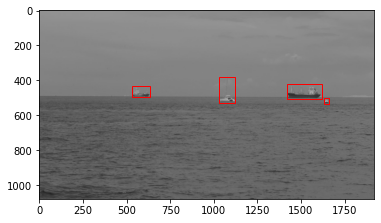

In [43]:
print(VIDEO_FRAMES_PATH_NIR)
im = np.array(Image.open(VIDEO_FRAMES_PATH_NIR + video_name +'_frame'+frame +".jpg"), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# for every object in frame crate a rectangle patch
for entry in relevant_objects:
    data = entry.split(',')

    # Create a Rectangle patch
    rect = patches.Rectangle((float(data[1]),float(data[2])),float(data[3]),float(data[4]),linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()